In [58]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt
import pandas as pd

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [8]:
engine = create_engine("sqlite:////Users/Maria/Desktop/surfs_up/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [50]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.
June_Temps  = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6 ).all()

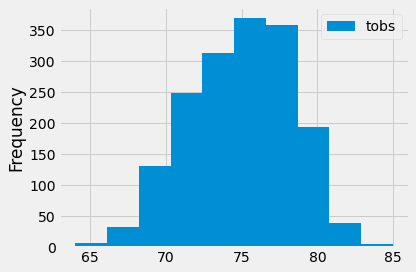

In [65]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
June_df = pd.DataFrame(June_Temps, columns=['tobs'])
June_df.plot.hist(bins=10)
plt.tight_layout()

In [53]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_df.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [54]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
Dec_Temps  = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12 ).all()

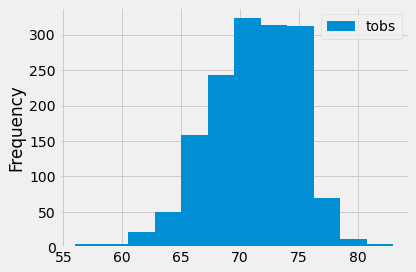

In [61]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
Dec_df = pd.DataFrame(Dec_Temps, columns=['tobs'])

Dec_df.plot.hist(bins=12)
plt.tight_layout()

In [56]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
Dec_df.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000
